# 2-12. 프로젝트1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

### (1) 데이터 가져오기

In [157]:
from sklearn.datasets import load_diabetes
import seaborn as sns
import numpy as np
diabetes=load_diabetes()


In [158]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [159]:
df_X = diabetes.data
df_y = diabetes.target

## (2) 모델에 입력할 데이터 준비하기

In [160]:
df_x = np.array(df_x)


## (3) 모델에 예측할 데이터 y 준비하기

In [161]:
y = np.array(df_y)

## (4) train 데이터와 test 데이터로 분리하기

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## (5) 모델 준비하기

In [163]:
W = np.random.rand(10) # rand(행, 열)
b = np.random.rand()

In [164]:
W

array([0.57448176, 0.84254852, 0.80188252, 0.29068005, 0.98488468,
       0.28373217, 0.20292829, 0.2134348 , 0.90284593, 0.22910864])

In [165]:
b

0.036557907610011986

In [166]:
def model(X, w, b):
  predictions = 0
  for i in range(10):
    predictions += X[:, i]* w[i]
  predictions += b
  return predictions

## (6) 손실함수 loss 정의하기

In [167]:
# 오류를 측정해주는 함수 MSE
def MSE(a, b):
  mse = ((a-b) ** 2).mean() # 두 값의 차이의 제곱의 평균
  return mse

In [168]:
def loss(X,w,b,y):
  predictions = model(X,W,b)
  L = MSE(predictions, y)
  return L

## (7) 기울기를 구하는 gradient 함수 구현하기

In [169]:
def gradient(X, W, b, y):
  N = len(W)
  y_pred = model(X, W, b)
  dW = 1/N * 2 * X.T.dot(y_pred - y)
  db = 2 * (y_pred - y).mean()
  return dW, db

In [170]:
dW, db = gradient(df_X, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [ -60.51122145  -13.67600734 -189.50239587 -142.59665088  -68.17980725
  -55.93065826  127.61086688 -138.92823431 -182.74527581 -123.47271328]
db: -304.19385251057184


## (8) 하이퍼 파라미터인 학습률 설정하기

In [171]:
LEARNING_RATE = 0.2

## (9) 모델 학습하기

In [172]:
losses = []

for i in range(1, 1001):
  dW, db = gradient(X_train, W, b, y_train)
  W -= LEARNING_RATE * dW
  b -= LEARNING_RATE * db
  L = loss(X_train, W, b, y_train)
  losses.append(L)
  if i % 10 == 0:
    print('lteration %d : Loss %0.4f' % (i, L))

lteration 10 : Loss 3640.2563
lteration 20 : Loss 3223.7230
lteration 30 : Loss 3064.1314
lteration 40 : Loss 2986.8552
lteration 50 : Loss 2947.1319
lteration 60 : Loss 2926.0270
lteration 70 : Loss 2914.4599
lteration 80 : Loss 2907.9091
lteration 90 : Loss 2904.0668
lteration 100 : Loss 2901.7263
lteration 110 : Loss 2900.2410
lteration 120 : Loss 2899.2559
lteration 130 : Loss 2898.5707
lteration 140 : Loss 2898.0697
lteration 150 : Loss 2897.6842
lteration 160 : Loss 2897.3727
lteration 170 : Loss 2897.1093
lteration 180 : Loss 2896.8780
lteration 190 : Loss 2896.6681
lteration 200 : Loss 2896.4729
lteration 210 : Loss 2896.2880
lteration 220 : Loss 2896.1103
lteration 230 : Loss 2895.9378
lteration 240 : Loss 2895.7692
lteration 250 : Loss 2895.6037
lteration 260 : Loss 2895.4404
lteration 270 : Loss 2895.2791
lteration 280 : Loss 2895.1195
lteration 290 : Loss 2894.9612
lteration 300 : Loss 2894.8042
lteration 310 : Loss 2894.6484
lteration 320 : Loss 2894.4936
lteration 330 : L

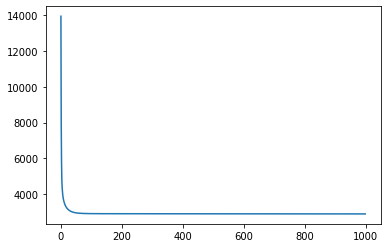

In [173]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [174]:
W, b

(array([  41.50462429, -240.57413592,  554.94106874,  343.7031992 ,
        -284.6049503 ,   11.2445211 , -127.54815022,  184.78787682,
         488.67088191,   53.29378173]), 151.3126051532714)

## (10) test 데이터에 대한 성능 확인하기

In [175]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2886.2121096151186

## (11) 정답 데이터와 예측한 데이터 시각화하기

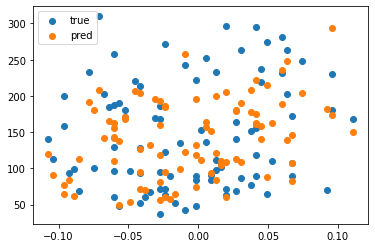

In [176]:
plt.scatter(X_test[:,0], y_test,label="true")
plt.scatter(X_test[:,0], prediction, label="pred")
plt.legend()
plt.show()

## 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [205]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dhwan44","key":"2b94235f44e664a4180c864c1180fc45"}'}

In [206]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json

In [207]:
!kaggle competitions download -c bike-sharing-demand

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 77.0MB/s]


In [208]:
!unzip bike-sharing-demand.zip

Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


## 데이터 가져오기

In [209]:
from sklearn.datasets import load_diabetes
import pandas as pd

train = pd.read_csv('/content/train.csv')
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## datetime 컬럼을 datetime 자료형으로 변환하고 연,월,일,시,분,초까지 6가지 컬럼 생성하기

In [210]:
train['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [211]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [212]:
train['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [213]:
train['datetime'].dt.year 

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

In [214]:
train['datetime'].dt.month

0         1
1         1
2         1
3         1
4         1
         ..
10881    12
10882    12
10883    12
10884    12
10885    12
Name: datetime, Length: 10886, dtype: int64

In [215]:
train['datetime'].dt.day

0         1
1         1
2         1
3         1
4         1
         ..
10881    19
10882    19
10883    19
10884    19
10885    19
Name: datetime, Length: 10886, dtype: int64

In [216]:
train['datetime'].dt.hour

0         0
1         1
2         2
3         3
4         4
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: datetime, Length: 10886, dtype: int64

In [217]:
train['datetime'].dt.minute

0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: datetime, Length: 10886, dtype: int64

In [218]:
train['datetime'].dt.second

0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: datetime, Length: 10886, dtype: int64

In [219]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [220]:
train.head

<bound method NDFrame.head of                  datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  year  month  \
0  

## year, month, day, hour, minute, second 데이터 개수 시각화하기

In [221]:
import seaborn as sns
import matplotlib.pyplot

## X,y 컬럼 선택 및 train/test 데이터 분리

In [222]:
train = train[['datetime',	'season',	'holiday',	'workingday',	'weather',	'temp',	'atemp',	'humidity',	'windspeed',	'casual',	'registered',	'count',	'year',	'month',	'day',	'hour',	'minute',	'second']]


In [223]:
X = train[['season', 'weather', 'windspeed', 'month', 'hour', 'workingday','holiday', 'temp', 'humidity']].values
y = train['count'].values

In [224]:
X.shape, y.shape

((10886, 9), (10886,))

In [225]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 9) (8708,)
(2178, 9) (2178,)


## LinearRegression 모델 학습

In [226]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [227]:
model.fit(X_train, y_train)

LinearRegression()

## 학습된 모델 X_test에 대한 예측값 출력 및 손실함수값 계산

In [228]:
predictions = model.predict(X_test)
predictions

array([285.57644836,   4.52618023, 245.8649291 , ..., 267.6451673 ,
        -5.18173996, 202.29629079])

In [229]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test, predictions)
mse

21675.754760414027

In [230]:
RMSE = mse ** 0.5
RMSE

147.22688192179453

## x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

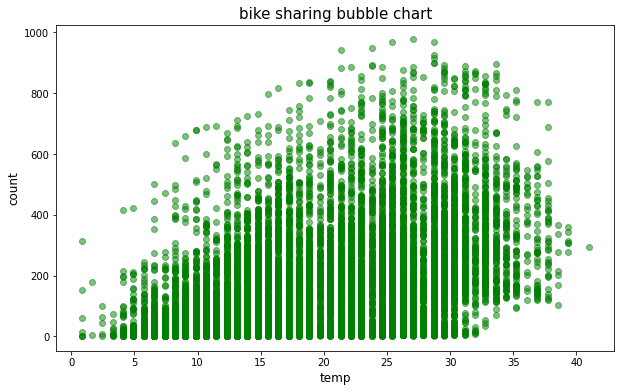

In [231]:
plt.figure(figsize=(10, 6))

plt.scatter(train['temp'],
            train['count'],
            c='green',
            alpha = 0.5)

plt.xlabel('temp', size=12)
plt.ylabel('count', size=12)
plt.title('bike sharing bubble chart', size=15)
plt.show()

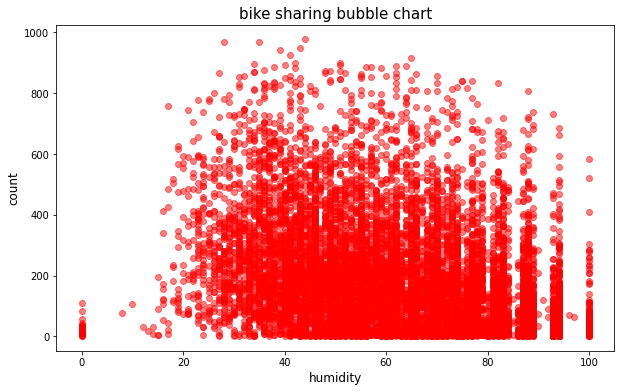

In [232]:
plt.figure(figsize=(10,6))

plt.scatter(train['humidity'],
            train['count'],
            c = 'red',
            alpha = 0.5)

plt.xlabel('humidity', size=12)
plt.ylabel('count', size=12)
plt.title('bike sharing bubble chart', size =15)
plt.show()

# 회고

이번과제를 하면서 나 자신이 많이 부족하다는 것을 알게 되었다. 익스를 진행하면서 이부분도 모르겠고 저부분도 모르겠다는 느낌을 강하게 받았다. 파이썬을 진행하면서 그 부분이 어려워서 헤멨던게 그 뒤에 배우는 내용까지 영향을 미쳤던것 같다. 당연히 파이썬이 넘파이, 판다스, 데이터 시각화등의 내용에 연관성이 짙은 것은 아니지만 나 자신이 조금은 손을 놓았던 것 같다. 이번 익스에서 어떤 것을 타겟으로 할지 이런 부분에 대해서 좀더 생각하게 되었던 것 같다. 또한 데이터를 분석할 떄 어떻게 접근 해야할지에 대해서 생각하게 된 계기였다. 나 자신의 위치를 알게 하고 나에 대해 생각하게 했으며 어떻게 나아가야 하는지에 대한 방향성을 알게된 익스였던것 같다.